In [192]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
    roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
# Common imports
import numpy as np
import os
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [193]:
X_train = pd.read_csv("../x_train_all.csv")
X_test = pd.read_csv("../x_test_all.csv")
y_train = pd.read_csv("../y_train_all.csv")
y_test = pd.read_csv("../y_test_all.csv")

ERROR! Session/line number was not unique in database. History logging moved to new session 98


# Balance the dataset

In [194]:
a= y_train.value_counts()
a

0
2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
dtype: int64

In [195]:
from sklearn.utils import resample

y_train.columns = ['Class']

concatenated = pd.concat([X_train, y_train.rename(columns={0: "Output"})], axis="columns")
concatenated.head()

#create two different dataframe of majority and minority class 
df_class_2 = concatenated[(concatenated['Class']==2)] 
df_class_0 = concatenated[(concatenated['Class']==0)] 
df_class_1 = concatenated[(concatenated['Class']==1)] 
df_class_3 = concatenated[(concatenated['Class']==3)] 
df_class_4 = concatenated[(concatenated['Class']==4)] 
df_class_5 = concatenated[(concatenated['Class']==5)] 
df_class_6 = concatenated[(concatenated['Class']==6)] 
df_class_7 = concatenated[(concatenated['Class']==7)] 
df_class_8 = concatenated[(concatenated['Class']==8)] 
df_class_9 = concatenated[(concatenated['Class']==9)] 


df_class_0_upsampled = resample(df_class_0, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results

df_class_1_upsampled = resample(df_class_1, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results
df_class_3_upsampled = resample(df_class_3, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results

df_class_4_upsampled = resample(df_class_4, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results
df_class_5_upsampled = resample(df_class_5, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results

df_class_6_upsampled = resample(df_class_6, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results
df_class_7_upsampled = resample(df_class_7, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results


df_class_8_upsampled = resample(df_class_8, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results
df_class_9_upsampled = resample(df_class_9, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2250, # to match majority class
                                 random_state=42)  # reproducible results

dfs = [df_class_0_upsampled, df_class_1_upsampled, df_class_3_upsampled, df_class_4_upsampled, 
                          df_class_5_upsampled, df_class_6_upsampled, df_class_7_upsampled, df_class_8_upsampled, df_class_9_upsampled,
                          df_class_2]


result = pd.concat(dfs)

result = result.reset_index(drop=True)
result

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,21.0,23.0,25.0,26.0,29.0,30.0,32.0,34.0,36.0,39.0,...,144.0,134.0,125.0,116.0,109.0,101.0,121.0,138.0,143.0,0
1,138.0,112.0,110.0,110.0,110.0,110.0,108.0,106.0,104.0,106.0,...,196.0,198.0,209.0,203.0,197.0,199.0,194.0,193.0,203.0,0
2,22.0,22.0,21.0,22.0,22.0,23.0,27.0,31.0,35.0,37.0,...,158.0,162.0,160.0,158.0,159.0,141.0,112.0,86.0,69.0,0
3,132.0,134.0,98.0,70.0,67.0,88.0,138.0,216.0,247.0,254.0,...,81.0,87.0,82.0,80.0,74.0,74.0,82.0,92.0,102.0,0
4,24.0,26.0,27.0,28.0,30.0,33.0,35.0,37.0,38.0,36.0,...,145.0,141.0,127.0,110.0,100.0,98.0,100.0,115.0,128.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,25.0,23.0,26.0,26.0,30.0,32.0,29.0,25.0,25.0,23.0,...,23.0,23.0,23.0,23.0,24.0,24.0,22.0,24.0,24.0,2
22496,21.0,21.0,20.0,21.0,21.0,22.0,23.0,22.0,22.0,21.0,...,25.0,25.0,24.0,23.0,23.0,24.0,24.0,25.0,27.0,2
22497,21.0,20.0,20.0,20.0,20.0,22.0,24.0,24.0,24.0,22.0,...,20.0,22.0,22.0,24.0,25.0,24.0,23.0,24.0,25.0,2
22498,24.0,22.0,20.0,20.0,21.0,21.0,20.0,19.0,19.0,22.0,...,25.0,21.0,22.0,24.0,24.0,22.0,23.0,22.0,20.0,2


In [196]:
X_train_upsampled = result.drop(["Class"], axis=1)
X_train_upsampled

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,21.0,23.0,25.0,26.0,29.0,30.0,32.0,34.0,36.0,39.0,...,153.0,144.0,134.0,125.0,116.0,109.0,101.0,121.0,138.0,143.0
1,138.0,112.0,110.0,110.0,110.0,110.0,108.0,106.0,104.0,106.0,...,193.0,196.0,198.0,209.0,203.0,197.0,199.0,194.0,193.0,203.0
2,22.0,22.0,21.0,22.0,22.0,23.0,27.0,31.0,35.0,37.0,...,155.0,158.0,162.0,160.0,158.0,159.0,141.0,112.0,86.0,69.0
3,132.0,134.0,98.0,70.0,67.0,88.0,138.0,216.0,247.0,254.0,...,75.0,81.0,87.0,82.0,80.0,74.0,74.0,82.0,92.0,102.0
4,24.0,26.0,27.0,28.0,30.0,33.0,35.0,37.0,38.0,36.0,...,147.0,145.0,141.0,127.0,110.0,100.0,98.0,100.0,115.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,25.0,23.0,26.0,26.0,30.0,32.0,29.0,25.0,25.0,23.0,...,24.0,23.0,23.0,23.0,23.0,24.0,24.0,22.0,24.0,24.0
22496,21.0,21.0,20.0,21.0,21.0,22.0,23.0,22.0,22.0,21.0,...,25.0,25.0,25.0,24.0,23.0,23.0,24.0,24.0,25.0,27.0
22497,21.0,20.0,20.0,20.0,20.0,22.0,24.0,24.0,24.0,22.0,...,21.0,20.0,22.0,22.0,24.0,25.0,24.0,23.0,24.0,25.0
22498,24.0,22.0,20.0,20.0,21.0,21.0,20.0,19.0,19.0,22.0,...,25.0,25.0,21.0,22.0,24.0,24.0,22.0,23.0,22.0,20.0


In [197]:
y_train_upsampled =result["Class"]
y_train_upsampled
y_train_upsampled.columns = ['Class']

In [198]:
features = [0,1,2,3,4,5,6,7,8,9]

# Functions

In [199]:
def overall_model_eval(actual,pred):
    accuracy = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred, average="weighted")
    precision = precision_score(actual, pred,  average="weighted")
    recall = recall_score(actual, pred,  average="weighted")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    return accuracy, f1, precision, recall
    

In [200]:
def each_cat_eval(conf_matrix):
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    d = {'Recall': TPR, 'TNR': TNR, 'Precision':PPV, 'NPV': NPV, 'FPR':FPR, 'FNR':FNR,'FDR':FDR, 'ACC':ACC}
    df = pd.DataFrame(data=d)
    print("Against each category\n", df)

    
    return TPR, TNR, PPV, NPV, FPR, FNR, FDR, ACC

In [201]:
def cross_validation_kfold(model_arg,train_inp,train_out):
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    y_scores = cross_val_score(model_arg, train_inp, train_out, cv=k_fold, n_jobs=1)
    print(y_scores)

In [202]:
from sklearn.metrics import classification_report
label_names = ['0','1','2','3','4','5','6','7','8','9']
# print(classification_report(y_test, y_pred_1, target_names=label_names))

In [203]:
from sklearn.preprocessing import label_binarize

def plot_roc_curves(actual, pred_prob_arg, classes=features):
    y_test_binarized = label_binarize(actual, classes=classes)
    
    fpr = {}
    tpr = {}
    thresh = {}
    roc_auc = dict()
    
    for i in range(len(classes)):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob_arg[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
    
    
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

In [204]:
def get_new_test_train_data(training_data, testing_data, training_labels, testing_labels, perc):
    new_x_train = training_data.sample(frac=perc, random_state=42)
    last_row_index_1 = new_x_train.shape[0]
    testing_data_subset = training_data.iloc[last_row_index_1:]
    frames_1 = [testing_data, testing_data_subset]
    new_x_test = pd.concat(frames_1)
    print("new_x_test shape",new_x_test.shape)
    
    new_y_train = training_labels.sample(frac=perc, random_state=42)
    last_row_index_2 = new_y_train.shape[0]
    testing_label_subset = training_labels.iloc[last_row_index_2:]
   
    
    #New Testing set:
    

    arr1= testing_labels.values.ravel();
    arr2= testing_label_subset.values.ravel();
    new_y_test = np.concatenate([arr1, arr2])
    new_y_test = pd.DataFrame(new_y_test)
    print("new_y_test\n", new_y_test.shape)

    return new_x_train, new_y_train, new_x_test, new_y_test

# Feature selection

In [205]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
def selectFTest(top_features, x_train_arg, y_train_arg, range_arg, x_test_arg, y_test_arg):
    selected_features = []

    for y_class in range(range_arg):
        selector = SelectKBest(score_func=f_classif, k=top_features)
        selector.fit(x_train_arg, (y_train_arg == y_class).astype(int))
        selected_indices = selector.get_support(indices=True)
        selected_features.extend(selected_indices)

    return x_train_arg.iloc[:, selected_features],x_test_arg.iloc[:, selected_features]

feature_selected_50 = selectFTest(5, X_train_upsampled, y_train_upsampled, 10, X_test, y_test) # 50 features
x_train_50 = feature_selected_50[0];
x_test_50 = feature_selected_50[1];

# Decision tree

In [206]:
tree_clf = DecisionTreeClassifier(random_state=42) 
tree_clf.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(random_state=42)

# Cross Validation

In [207]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
y_scores = cross_val_score(tree_clf, x_train_50, y_train_upsampled, cv=k_fold, n_jobs=1)
print(y_scores)

[0.95777778 0.94977778 0.95866667 0.95244444 0.956      0.95155556
 0.96       0.95644444 0.95333333 0.95066667]


As seen by the reuslts, we can see that the resulting scores of the cross validation is quite high for every class.

# Train and Test Set

We now try with test dataset provided with the coursework

In [208]:
y_pred = tree_clf.predict(x_test_50) # model 1 predictions
pred_prob =  tree_clf.predict_proba(x_test_50) #  returns the probabilities associated with each class

## Confusion Matrix

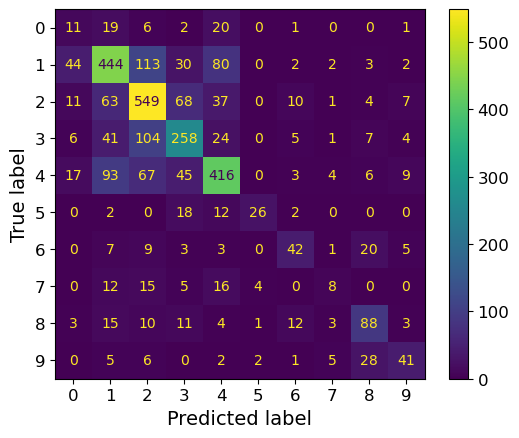

In [209]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred, labels=features)
disp_plot = ConfusionMatrixDisplay(confusion_matrix_1, display_labels=features)
disp_plot.plot();

# Overall metrics 

In [210]:
overall_model_eval(y_test,y_pred)

Accuracy: 0.6093851132686084
F1 Score: 0.6076820684131843
Precision: 0.6127726842943444
Recall: 0.6093851132686084


(0.6093851132686084,
 0.6076820684131843,
 0.6127726842943444,
 0.6093851132686084)

# Evaluating metrics against each category

In [211]:
TPR_1, TNR_1, PPV_1, NPV_1, FPR_1, FNR_1, FDR_1, ACC_1 = each_cat_eval(confusion_matrix_1)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.183333  0.973267   0.119565  0.983656  0.026733  0.816667  0.880435   
1  0.616667  0.891561   0.633381  0.884470  0.108439  0.383333  0.366619   
2  0.732000  0.858974   0.624573  0.909091  0.141026  0.268000  0.375427   
3  0.573333  0.931061   0.586364  0.927547  0.068939  0.426667  0.413636   
4  0.630303  0.918519   0.677524  0.901454  0.081481  0.369697  0.322476   
5  0.433333  0.997690   0.787879  0.988878  0.002310  0.566667  0.212121   
6  0.466667  0.988000   0.538462  0.984064  0.012000  0.533333  0.461538   
7  0.133333  0.994389   0.320000  0.983034  0.005611  0.866667  0.680000   
8  0.586667  0.976871   0.564103  0.978868  0.023129  0.413333  0.435897   
9  0.455556  0.989667   0.569444  0.983764  0.010333  0.544444  0.430556   

        ACC  
0  0.957929  
1  0.827508  
2  0.828155  
3  0.878964  
4  0.856958  
5  0.986731  
6  0.972816  
7  0.977670  
8  0.957929  


In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.18      0.14        60
           1       0.63      0.62      0.62       720
           2       0.62      0.73      0.67       750
           3       0.59      0.57      0.58       450
           4       0.68      0.63      0.65       660
           5       0.79      0.43      0.56        60
           6       0.54      0.47      0.50        90
           7       0.32      0.13      0.19        60
           8       0.56      0.59      0.58       150
           9       0.57      0.46      0.51        90

    accuracy                           0.61      3090
   macro avg       0.54      0.48      0.50      3090
weighted avg       0.61      0.61      0.61      3090



# ROC Curve 

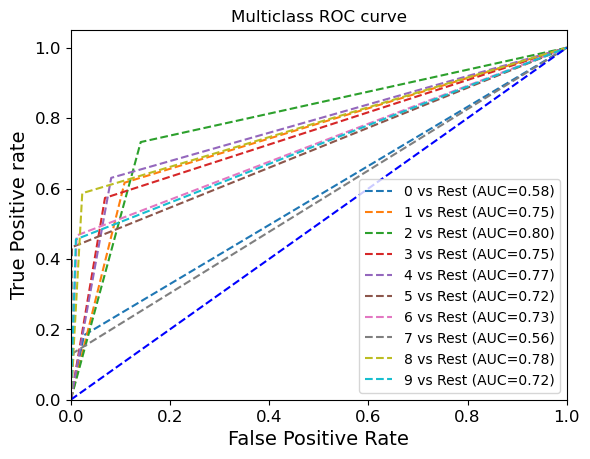

In [213]:
plot_roc_curves(y_test, pred_prob)

From the above experiments we see that is a quite a difference in the performance of both evaluation methods, with cross validation giving a 95% average performance and the testing dataset only giving a 65% average performance (all metrics averaged as they fall in similar range). 

This has led us to the conclusion that there may have been overfitting as there is a presence of repeated minority data due to the upsampling that is present in both the training and test sets while performing K-Fold Cross Validation. This may have led us to the results that skew the overall performance of the model itself and does not give an unbiased view unlike the provided test set.

# Experimentation with various decision tree parameters 

# Criterion and Splitter

In [214]:
tree_clf_1 = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=42) #model 1
tree_clf_2 = DecisionTreeClassifier(criterion='entropy',splitter='random', random_state=42) #model 2
tree_clf_3 = DecisionTreeClassifier(criterion='log_loss',splitter='random' ,random_state=42) #model 2
tree_clf_1.fit(x_train_50, y_train_upsampled)
tree_clf_2.fit(x_train_50, y_train_upsampled)
tree_clf_3.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(criterion='log_loss', random_state=42, splitter='random')

# Model 1: Criterion - Gini, Splitter - Random

In [215]:
y_pred_1 = tree_clf_1.predict(x_test_50) # model 1 predictions
pred_prob_1 =  tree_clf_1.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [216]:
overall_model_eval(y_test,y_pred_1)

Accuracy: 0.587378640776699
F1 Score: 0.5874302232517662
Precision: 0.5899929281409849
Recall: 0.587378640776699


(0.587378640776699, 0.5874302232517662, 0.5899929281409849, 0.587378640776699)

# Model 2: Criterion - entropy, Splitter - Random

In [217]:
y_pred_2 = tree_clf_2.predict(x_test_50) # model 1 predictions
pred_prob_2 =  tree_clf_2.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [218]:
overall_model_eval(y_test,y_pred_2)

Accuracy: 0.6300970873786408
F1 Score: 0.6281862569648763
Precision: 0.6295968286030804
Recall: 0.6300970873786408


(0.6300970873786408,
 0.6281862569648763,
 0.6295968286030804,
 0.6300970873786408)

# Model 3: Criterion - log_loss, Splitter - Random

In [219]:
y_pred_3 = tree_clf_3.predict(x_test_50) # model 1 predictions
pred_prob_3 =  tree_clf_3.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [220]:
overall_model_eval(y_test,y_pred_3)

Accuracy: 0.6300970873786408
F1 Score: 0.6281862569648763
Precision: 0.6295968286030804
Recall: 0.6300970873786408


(0.6300970873786408,
 0.6281862569648763,
 0.6295968286030804,
 0.6300970873786408)

# max_leaf_nodes , max_depth

In [221]:
tree_clf_4 = DecisionTreeClassifier(max_leaf_nodes = 10, max_depth = 10, random_state=42) #model 1
tree_clf_5 = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=42) #model 2
tree_clf_6 = DecisionTreeClassifier(max_depth = 10, random_state=42) #model 2
tree_clf_4.fit(x_train_50, y_train_upsampled)
tree_clf_5.fit(x_train_50, y_train_upsampled)
tree_clf_6.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(max_depth=10, random_state=42)

# Model 4: max_leaf_nodes = 10, max_depth = 10

In [222]:
y_pred_4 = tree_clf_4.predict(x_test_50) # model 1 predictions
pred_prob_4 =  tree_clf_4.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [223]:
overall_model_eval(y_test,y_pred_4)

Accuracy: 0.17411003236245956
F1 Score: 0.09360420492426202
Precision: 0.07882931110553607
Recall: 0.17411003236245956


D:\Applications\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.17411003236245956,
 0.09360420492426202,
 0.07882931110553607,
 0.17411003236245956)

# Model 5: max_leaf_nodes = 10

In [257]:
y_pred_5 = tree_clf_5.predict(x_test_50) # model 1 predictions
pred_prob_5 =  tree_clf_5.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [258]:
overall_model_eval(y_test,y_pred_5)

Accuracy: 0.17411003236245956
F1 Score: 0.09360420492426202
Precision: 0.07882931110553607
Recall: 0.17411003236245956


D:\Applications\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.17411003236245956,
 0.09360420492426202,
 0.07882931110553607,
 0.17411003236245956)

# Model 6: max_depth = 10

In [226]:
y_pred_6 = tree_clf_6.predict(x_test_50) # model 1 predictions
pred_prob_6 =  tree_clf_6.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [227]:
overall_model_eval(y_test,y_pred_6)

Accuracy: 0.5459546925566343
F1 Score: 0.5523458483251356
Precision: 0.5690570409941939
Recall: 0.5459546925566343


(0.5459546925566343,
 0.5523458483251356,
 0.5690570409941939,
 0.5459546925566343)

# Model 7: max_features = 25

In [228]:
tree_clf_7 = DecisionTreeClassifier(max_features = 25, random_state=42) #model 2
tree_clf_7.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(max_features=25, random_state=42)

In [229]:
y_pred_7 = tree_clf_7.predict(x_test_50) # model 1 predictions
pred_prob_7 =  tree_clf_7.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [230]:
overall_model_eval(y_test,y_pred_7)

Accuracy: 0.5899676375404531
F1 Score: 0.5877947483765019
Precision: 0.5901939348108916
Recall: 0.5899676375404531


(0.5899676375404531,
 0.5877947483765019,
 0.5901939348108916,
 0.5899676375404531)

# Model 8: min_weight_fraction_leaf = 0.5

In [231]:
tree_clf_8 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.5, random_state=42) #model 2
tree_clf_8.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(min_weight_fraction_leaf=0.5, random_state=42)

In [232]:
y_pred_8 = tree_clf_8.predict(x_test_50) # model 1 predictions
pred_prob_8 =  tree_clf_8.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [233]:
overall_model_eval(y_test,y_pred_8)

Accuracy: 0.1669902912621359
F1 Score: 0.05566717273656566
Precision: 0.03348174454815042
Recall: 0.1669902912621359


D:\Applications\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.1669902912621359,
 0.05566717273656566,
 0.03348174454815042,
 0.1669902912621359)

# Model 9: min_samples_leaf = 8

In [234]:
tree_clf_9 = DecisionTreeClassifier(min_samples_leaf = 30, random_state=42) #model 2
tree_clf_9.fit(x_train_50, y_train_upsampled)

DecisionTreeClassifier(min_samples_leaf=30, random_state=42)

In [235]:
y_pred_9 = tree_clf_9.predict(x_test_50) # model 1 predictions
pred_prob_9 =  tree_clf_9.predict_proba(x_test_50) #  returns the probabilities associated with each class

In [236]:
overall_model_eval(y_test,y_pred_9)

Accuracy: 0.5792880258899676
F1 Score: 0.5884363097090256
Precision: 0.6069663722934078
Recall: 0.5792880258899676


(0.5792880258899676,
 0.5884363097090256,
 0.6069663722934078,
 0.5792880258899676)

With the above experiments, we notice that most of the performance tends to get much worse with the parameters tested. Using large depth and leaf nodes parameters seems to really decrease the overall accuracy, precision and recall of the models used. Among the criterions used, we notice similar performance for both the Entropy criterion and the Log Loss criterion, which provides relatively better results compared to the remaining experiments.

# New training and testing sets

After training on the intial dataset, we conduct 2 experiments where we test the results from moving 30% of the training data into the test datas and 60% of training to test data. We then evaluate the performance like we have already done

## 30% from the original training set into the testing set

In [237]:
a = get_new_test_train_data(x_train_50,x_test_50,y_train_upsampled,y_test, 0.7);

new_x_test shape (9840, 50)
new_y_test
 (9840, 1)


In [238]:
new_x_train_1 =a[0]
new_y_train_1 = a[1]
new_x_test_1 =a[2]
new_y_test_1 = a[3]


In [239]:
tree_clf_10 = DecisionTreeClassifier(criterion='entropy',splitter='random', random_state=42) #model 10
tree_clf_10.fit(new_x_train_1, new_y_train_1)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [240]:
y_pred_10 = tree_clf_10.predict(new_x_test_1);

In [241]:
overall_model_eval(new_y_test_1,y_pred_10)

Accuracy: 0.8574186991869919
F1 Score: 0.8591856967566683
Precision: 0.8617152989495663
Recall: 0.8574186991869919


(0.8574186991869919,
 0.8591856967566683,
 0.8617152989495663,
 0.8574186991869919)

## 60% from the original training set into the testing set

In [242]:
b = get_new_test_train_data(x_train_50,x_test_50,y_train_upsampled,y_test, 0.4);

new_x_test shape (16590, 50)
new_y_test
 (16590, 1)


In [243]:
new_x_train_2 =b[0]
new_y_train_2 = b[1]
new_x_test_2 =b[2]
new_y_test_2 = b[3]

In [244]:
tree_clf_11 = DecisionTreeClassifier(criterion='entropy',splitter='random', random_state=42) #model 10
tree_clf_11.fit(new_x_train_2, new_y_train_2)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [245]:
y_pred_11 = tree_clf_11.predict(new_x_test_2);

In [246]:
overall_model_eval(new_y_test_2,y_pred_11)

Accuracy: 0.8956600361663652
F1 Score: 0.8996822343287493
Precision: 0.9063237434483792
Recall: 0.8956600361663652


(0.8956600361663652,
 0.8996822343287493,
 0.9063237434483792,
 0.8956600361663652)

Comparing the metrics of the results here to the ones obtained earlier, we can see that there is quite an improvement in the performance. This can be attributed to overfitting as the model can easily recognize data that it has already seen before which artifically increases the observed performance. The observed improvement can be seen even further when comparing the 30% experiment and the 60% experiment as there is even an average 5% performance gain with the 60% set over the the 30%. This experiment shows the power of overfitting and how it easily skews the results obtained. 

# Random Forest Classifier

We also try using the random forest classifier and try some simple experiments on it.

In [247]:
random_clr = RandomForestClassifier(random_state=42) 
random_clr.fit(x_train_50, y_train_upsampled)

RandomForestClassifier(random_state=42)

# Cross Validation

In [248]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
y_scores = cross_val_score(random_clr, x_train_50, y_train_upsampled, cv=k_fold, n_jobs=1)
print(y_scores)

[0.98266667 0.98088889 0.98666667 0.984      0.98666667 0.99111111
 0.98711111 0.98133333 0.988      0.98666667]


We see that is even a greater performance gain compared to that for the decision tree model evaluated earlier. 

# Train and Test Set

In [249]:
y_pred = random_clr.predict(x_test_50) # model 1 predictions
pred_prob =  random_clr.predict_proba(x_test_50) #  returns the probabilities associated with each class

# Confusion Matrix

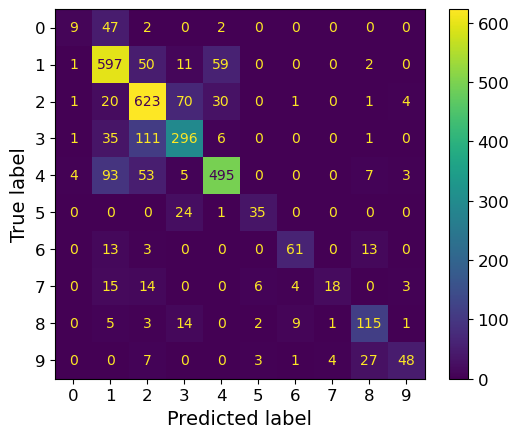

In [250]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred, labels=features)
disp_plot = ConfusionMatrixDisplay(confusion_matrix_1, display_labels=features)
disp_plot.plot();

# Overall metrics 

In [251]:
overall_model_eval(y_test,y_pred)

Accuracy: 0.7433656957928803
F1 Score: 0.7364232668419289
Precision: 0.745750718214968
Recall: 0.7433656957928803


(0.7433656957928803, 0.7364232668419289, 0.745750718214968, 0.7433656957928803)

# Evaluating metrics against each category

In [252]:
TPR_1, TNR_1, PPV_1, NPV_1, FPR_1, FNR_1, FDR_1, ACC_1 = each_cat_eval(confusion_matrix_1)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.150000  0.997690   0.562500  0.983409  0.002310  0.850000  0.437500   
1  0.829167  0.903797   0.723636  0.945695  0.096203  0.170833  0.276364   
2  0.830667  0.896154   0.719400  0.942896  0.103846  0.169333  0.280600   
3  0.657778  0.953030   0.704762  0.942322  0.046970  0.342222  0.295238   
4  0.750000  0.959671   0.834739  0.933921  0.040329  0.250000  0.165261   
5  0.583333  0.996370   0.760870  0.991787  0.003630  0.416667  0.239130   
6  0.677778  0.995000   0.802632  0.990378  0.005000  0.322222  0.197368   
7  0.300000  0.998350   0.782609  0.986306  0.001650  0.700000  0.217391   
8  0.766667  0.982653   0.692771  0.988030  0.017347  0.233333  0.307229   
9  0.533333  0.996333   0.813559  0.986143  0.003667  0.466667  0.186441   

        ACC  
0  0.981230  
1  0.886408  
2  0.880259  
3  0.910032  
4  0.914887  
5  0.988350  
6  0.985761  
7  0.984790  
8  0.972168  


In [253]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.12      0.17      0.14        60
           1       0.59      0.58      0.59       720
           2       0.64      0.70      0.67       750
           3       0.58      0.53      0.55       450
           4       0.63      0.61      0.62       660
           5       0.49      0.62      0.55        60
           6       0.61      0.50      0.55        90
           7       0.46      0.28      0.35        60
           8       0.55      0.55      0.55       150
           9       0.43      0.42      0.43        90

    accuracy                           0.59      3090
   macro avg       0.51      0.50      0.50      3090
weighted avg       0.59      0.59      0.59      3090



# ROC Curve 

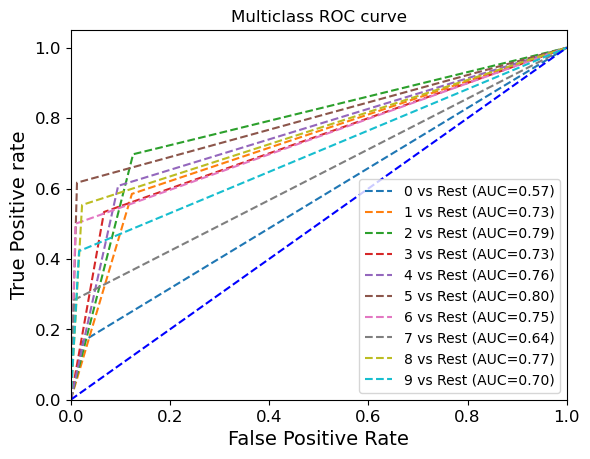

In [254]:
plot_roc_curves(y_test, pred_prob_1)

Seeing that there is a high true negative and false negative rate, as well as comparing the accruacy to the other model, we can come to the conclusion that the random forest model does perform better than the decision tree model as even evaluating with test data set has resulted in a 10% average performance improvement.